In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report


In [3]:
# Load the data
data = pd.read_csv('I:/WAF with mechine learning/Dataset/SQL and XSS/csic_database.csv')

In [4]:
data.columns=[ 'class','Method','User-Agent','Pragma','Cache-Control','Accept','Accept-encoding','Accept-charset','language','host','cookie','content-type', 'connection', 'lenght', 'content', 'classification', 'URL']

In [5]:
data = data.rename(columns={'Unnamed: 0': 'Class'})
data = data.rename(columns={'lenght': 'content_length'})
data.head()

,class,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,content_length,content,classification,URL
0,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...
3,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/autentic...
4,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,application/x-www-form-urlencoded,Connection: close,Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...


Validation Accuracy with SVM: 0.9630261660978384
Test Accuracy with SVM: 0.9675767918088737


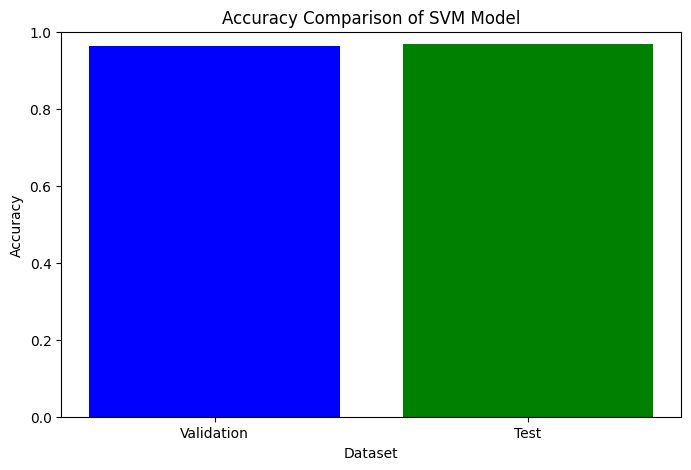

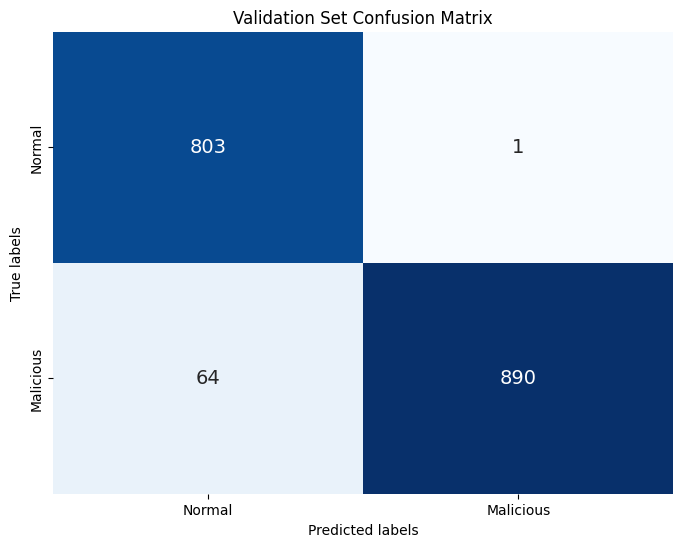

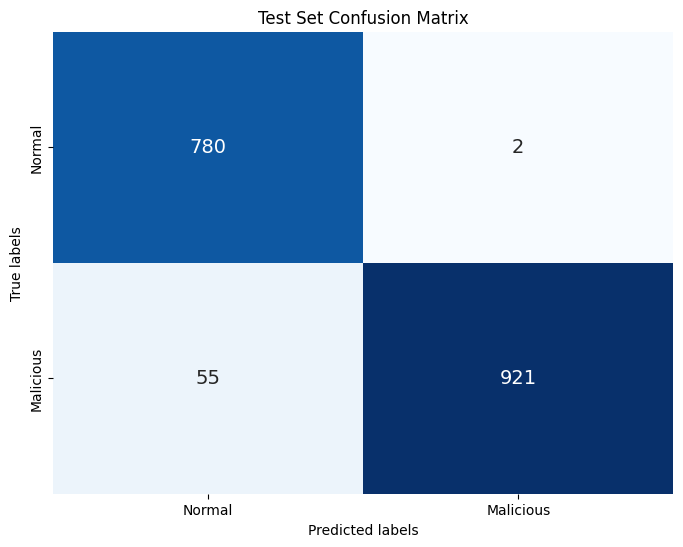

Precision: 0.9988776655443322
Recall: 0.9329140461215933
F1-score: 0.964769647696477
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       804
           1       1.00      0.93      0.96       954

    accuracy                           0.96      1758
   macro avg       0.96      0.97      0.96      1758
weighted avg       0.97      0.96      0.96      1758



In [6]:
#train test split in 80:20 ratio
np.random.seed(42)
tf.random.set_seed(42)

# Assuming you have your data loaded into 'data' DataFrame and processed as you did in the original code

required_columns = ['Method','host','cookie','Accept', 'content_length', 'content','classification','URL']

data.dropna(subset=required_columns, inplace=True)

data['combined_text'] = data['Method'] + ' ' + data['host'] + ' ' + data['cookie'] + ' ' + data['Accept'] + ' ' + data['content_length'] + ' ' + data['content'] + ' ' + data['URL']

data['combined_text'] = data['combined_text'].astype(str)

features = data['combined_text'].values
labels = data['classification'].values

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Evaluate SVM model
val_predictions = svm_model.predict(X_val_tfidf)
test_predictions = svm_model.predict(X_test_tfidf)

val_accuracy_svm = accuracy_score(y_val, val_predictions)
test_accuracy_svm = accuracy_score(y_test, test_predictions)

# Print test accuracy
print("Validation Accuracy with SVM:", val_accuracy_svm)
print("Test Accuracy with SVM:", test_accuracy_svm)
accuracy_scores = [val_accuracy_svm, test_accuracy_svm]
labels = ['Validation', 'Test']

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.title('Accuracy Comparison of SVM Model')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Setting y-axis limit to range between 0 and 1
plt.show()


from sklearn.metrics import confusion_matrix

# Generate confusion matrix for validation set
val_conf_matrix = confusion_matrix(y_val, val_predictions)

# Generate confusion matrix for test set
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Define function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,  xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'],
            annot_kws={'fontsize': 14})
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Plot confusion matrix for validation set
plot_confusion_matrix(val_conf_matrix, title='Validation Set Confusion Matrix')

# Plot confusion matrix for test set
plot_confusion_matrix(test_conf_matrix, title='Test Set Confusion Matrix')

from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
precision = precision_score(y_val, val_predictions)

# Calculate recall
recall = recall_score(y_val, val_predictions)

# Calculate F1-score
f1 = f1_score(y_val, val_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#clafication report
from sklearn.metrics import classification_report
print(classification_report(y_val, val_predictions))